Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehicle-fuel-type-count-by-zip-code-2022.csv')

C:\Users\schowdho\AppData\Local\Temp\ipykernel_25416\2144568332.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicle-fuel-type-count-by-zip-code-2022.csv')


Read in the data. This will be combined into 1 dataframe called df

In [3]:
#df = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/9aa5b4c5-252c-4d68-b1be-ffe19a2f1d26/download/vehicle-fuel-type-count-by-zip-code.csv')
#df2 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/888bbb6c-09b4-469c-82e6-1b2a47439736/download/vehicle-fuel-type-count-by-zip-code.csv')
#df3 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/4254a06d-9937-4083-9441-65597dd267e8/download/vehicle-fuel-type-count-by-zip-code.csv')
#df4 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/d304108a-06c1-462f-a144-981dd0109900/download/vehicle-fuel-type-count-by-zip-code.csv')


Combine the data

In [4]:
#frames = [df1, df2, df3, df4]
#df = pd.concat(frames)


Explore some basic information of the data

In [32]:
df.head()


,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Energy Consumption (kWh/mile),Energy Consumption (kWh/year)
0,2022-12-31,90000,2010,Gasoline,OTHER/UNK,NaN,1,0.015,NaN
1,2022-12-31,90000,2012,Hybrid Gasoline,OTHER/UNK,NaN,1,0.025,NaN
2,2022-12-31,90000,2013,Gasoline,OTHER/UNK,NaN,1,0.015,NaN
3,2022-12-31,90000,<2009,Gasoline,OTHER/UNK,NaN,19,0.015,NaN
4,2022-12-31,90000,<2009,Gasoline,OTHER/UNK,NaN,16,0.015,NaN


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767054 entries, 0 to 767053
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        767054 non-null  object
 1   Zip Code    767054 non-null  object
 2   Model Year  767054 non-null  object
 3   Fuel        767054 non-null  object
 4   Make        767054 non-null  object
 5   Duty        767054 non-null  object
 6   Vehicles    767054 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 41.0+ MB


In [7]:
df.describe()

,Vehicles
count,767054.000000
mean,40.562764
std,125.711478
min,1.000000
25%,9.000000
50%,18.000000
75%,39.000000
max,37407.000000


In [8]:
df.shape

(767054, 7)

Check for null values. luckily there are none

In [9]:
df.isnull().sum()


Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

Convert the Date column to datetime format for easier reading

In [10]:
df['Date'] = pd.to_datetime(df['Date'])


Get the unique fuel types

In [11]:
df['Fuel'].unique()


array(['Gasoline', 'Hybrid Gasoline', 'Unk', 'Diesel and Diesel Hybrid',
       'Flex-Fuel', 'Natural Gas', 'Battery Electric', 'Plug-in Hybrid',
       'Other', 'Hydrogen Fuel Cell'], dtype=object)

Get the unique make types

In [12]:
df['Make'].unique()

array(['OTHER/UNK', 'FORD', 'PLYMOUTH', 'CHEVROLET', 'Unk', 'GMC',
       'WHITE', 'INFINITI', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'DODGE',
       'JEEP', 'ACURA', 'HONDA', 'CHRYSLER', 'CADILLAC', 'NISSAN',
       'TOYOTA', 'MAZDA', 'BMW', 'HYUNDAI', 'LEXUS', 'KIA', 'SCION',
       'PONTIAC', 'FREIGHTLINER', 'RAM', 'AUDI', 'MINI', 'HINO',
       'MITSUBISHI', 'INTERNATIONAL', 'SUBARU', 'BUICK', 'TESLA',
       'MERCURY', 'LINCOLN', 'VOLVO', 'HUMMER', 'OLDSMOBILE', 'SATURN',
       'ISUZU', 'SUZUKI', 'LAND ROVER', 'PORSCHE', 'UNKNOWN', 'JAGUAR',
       'FIAT', 'GENESIS', 'SAAB', 'ALFA ROMEO', 'GEO', 'WORKHORSE',
       'AMERICAN LAFRANCE', 'NORTH AMERICAN BUS INDUSTRIES', 'PETERBILT',
       'MOTOR COACH INDUSTRIES', 'EL DORADO', 'NEW FLYER', 'KENWORTH',
       'GILLIG', 'BLUE BIRD', 'AUTOCAR', 'PIERCE', 'IC BUS', 'PROTERRA',
       'FWD', 'NEOPLAN', 'OSHKOSH', 'ORION', 'SEAGRAVE', 'STERLING',
       'FLXIBLE TRANSIT COACHES', 'MACK', 'TMC', 'WHITE/GMC', 'KALMAR',
       'PREVOST', 'MASERATI

In [13]:
# Select the 'Make' column
make_column_DMV2023 = df['Make'].unique()
# Create a DataFrame from the 'Make' column
make_df = pd.DataFrame({'Make': make_column_DMV2023})
# Export the DataFrame to Excel
make_df.to_excel('make_column_DMV2023.xlsx', index=False)

In [14]:
# Select the 'Make' column
make_column_DMV2023 = df['Make'].unique()
# Create a DataFrame from the 'Make' column
make_df = pd.DataFrame({'Make': make_column_DMV2023})
# Export the DataFrame to Excel
make_df.to_csv('make_column_DMV2023.csv', index=False)

In [15]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_make = df.groupby('Make').count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_make)
    
    # calculate the total number of vehicles
df['Vehicles'].count()

Make
OTHER/UNK                         318983
TOYOTA                             48709
FORD                               47262
CHEVROLET                          34812
HONDA                              30496
LEXUS                              19385
NISSAN                             19179
DODGE                              16217
MERCEDES-BENZ                      16108
BMW                                15802
HYUNDAI                            15621
VOLKSWAGEN                         15459
JEEP                               14610
SUBARU                             14423
KIA                                14244
GMC                                13768
MAZDA                              13579
ACURA                              10458
AUDI                                9751
RAM                                 8875
INFINITI                            6861
TESLA                               6805
CADILLAC                            5241
SCION                               5066
PORSCHE    

767054

In [16]:
excel_file=pd.ExcelWriter("make_count_DMV2023.xlsx")
vehicles_by_make.to_excel(excel_file)
excel_file.save()

C:\Users\schowdho\AppData\Local\Temp\ipykernel_25416\2134092582.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


Plotting the number of vehicles based on fuel type

In [17]:
fuel_counts = df.groupby('Fuel')['Vehicles'].sum().reset_index()

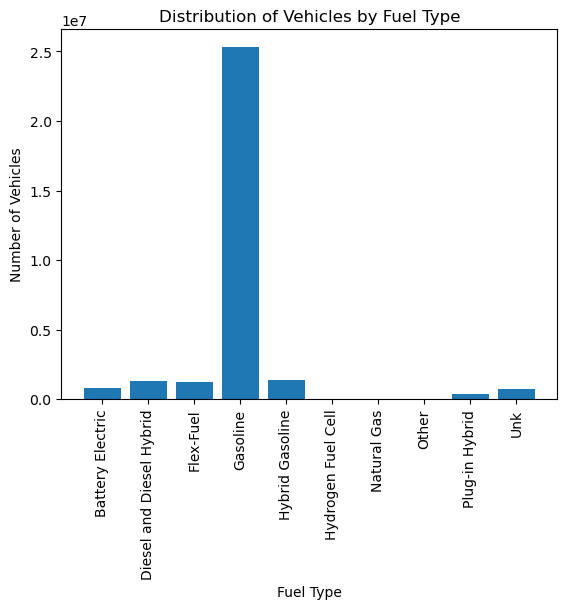

In [18]:
plt.bar(fuel_counts['Fuel'], fuel_counts['Vehicles'])
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Fuel Type')
plt.show()

determine how many vehicles are of a certain make

In [19]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_Fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_make)
    
    # calculate the total number of vehicles
df['Vehicles'].count()
  


Make
OTHER/UNK                         318983
TOYOTA                             48709
FORD                               47262
CHEVROLET                          34812
HONDA                              30496
LEXUS                              19385
NISSAN                             19179
DODGE                              16217
MERCEDES-BENZ                      16108
BMW                                15802
HYUNDAI                            15621
VOLKSWAGEN                         15459
JEEP                               14610
SUBARU                             14423
KIA                                14244
GMC                                13768
MAZDA                              13579
ACURA                              10458
AUDI                                9751
RAM                                 8875
INFINITI                            6861
TESLA                               6805
CADILLAC                            5241
SCION                               5066
PORSCHE    

767054

Lets represent the number of vehicles of a certain make as a ratio or percentage of the total number of vehicles in the dataset

In [20]:
# Get the count of each make
make_count = df['Make'].value_counts()

# Calculate the percentage of each make
make_percent = make_count / make_count.sum() * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(make_percent)


OTHER/UNK                         41.585469
TOYOTA                             6.350140
FORD                               6.161496
CHEVROLET                          4.538403
HONDA                              3.975731
LEXUS                              2.527201
NISSAN                             2.500345
DODGE                              2.114193
MERCEDES-BENZ                      2.099983
BMW                                2.060090
HYUNDAI                            2.036493
VOLKSWAGEN                         2.015373
JEEP                               1.904690
SUBARU                             1.880311
KIA                                1.856975
GMC                                1.794919
MAZDA                              1.770280
ACURA                              1.363398
AUDI                               1.271227
RAM                                1.157024
INFINITI                           0.894461
TESLA                              0.887160
CADILLAC                        

Lets represent the number of vehicles of a certain Fuel type as a ratio or percentage of the total number of vehicles in the dataset.

In [21]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_fuel)

Fuel
Gasoline                    437248
Diesel and Diesel Hybrid     94529
Flex-Fuel                    86383
Hybrid Gasoline              61911
Battery Electric             29205
Plug-in Hybrid               28177
Unk                          17683
Natural Gas                   6956
Hydrogen Fuel Cell            3752
Other                         1210
Name: Vehicles, dtype: int64


In [22]:
# calculate the total number of vehicles
total_vehicles = df['Vehicles'].count()
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(total_vehicles)

767054


In [23]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)

# calculate the total number of vehicles
total_vehicles = df['Vehicles'].count()

# calculate the percentage of vehicles for each fuel type
percentages = (vehicles_by_fuel / total_vehicles) * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percentages)

Fuel
Gasoline                    57.003549
Diesel and Diesel Hybrid    12.323643
Flex-Fuel                   11.261658
Hybrid Gasoline              8.071270
Battery Electric             3.807424
Plug-in Hybrid               3.673405
Unk                          2.305314
Natural Gas                  0.906846
Hydrogen Fuel Cell           0.489144
Other                        0.157746
Name: Vehicles, dtype: float64


<Figure size 1000x800 with 0 Axes>

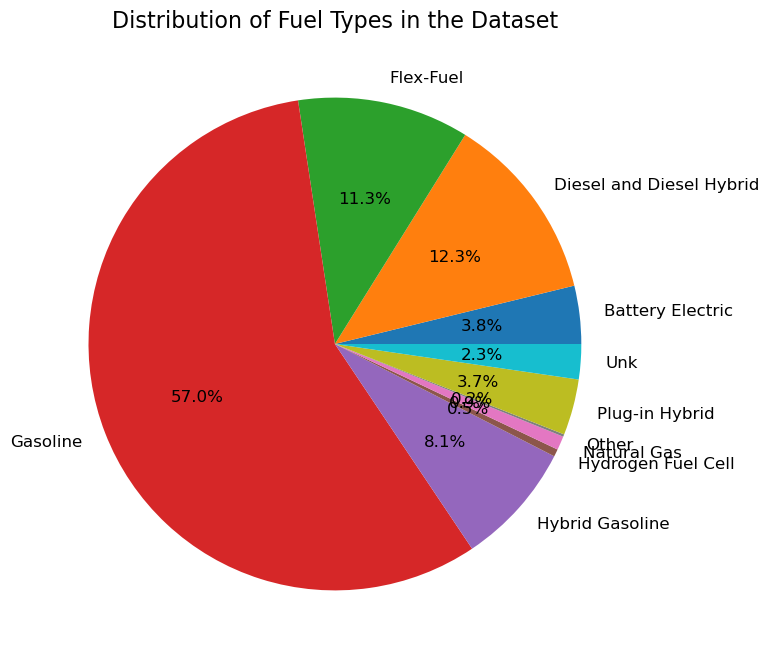

In [24]:
plt.figure(figsize=(10, 8)) # set the size of the figure
# group the data by fuel type and count the number of vehicles
fuel_counts = df.groupby('Fuel')['Vehicles'].count().reset_index()

# plot the distribution of fuel types using a pie chart


plt.figure(figsize=(10, 8))
plt.pie(fuel_counts['Vehicles'], labels=fuel_counts['Fuel'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribution of Fuel Types in the Dataset', fontsize=16)
plt.show()

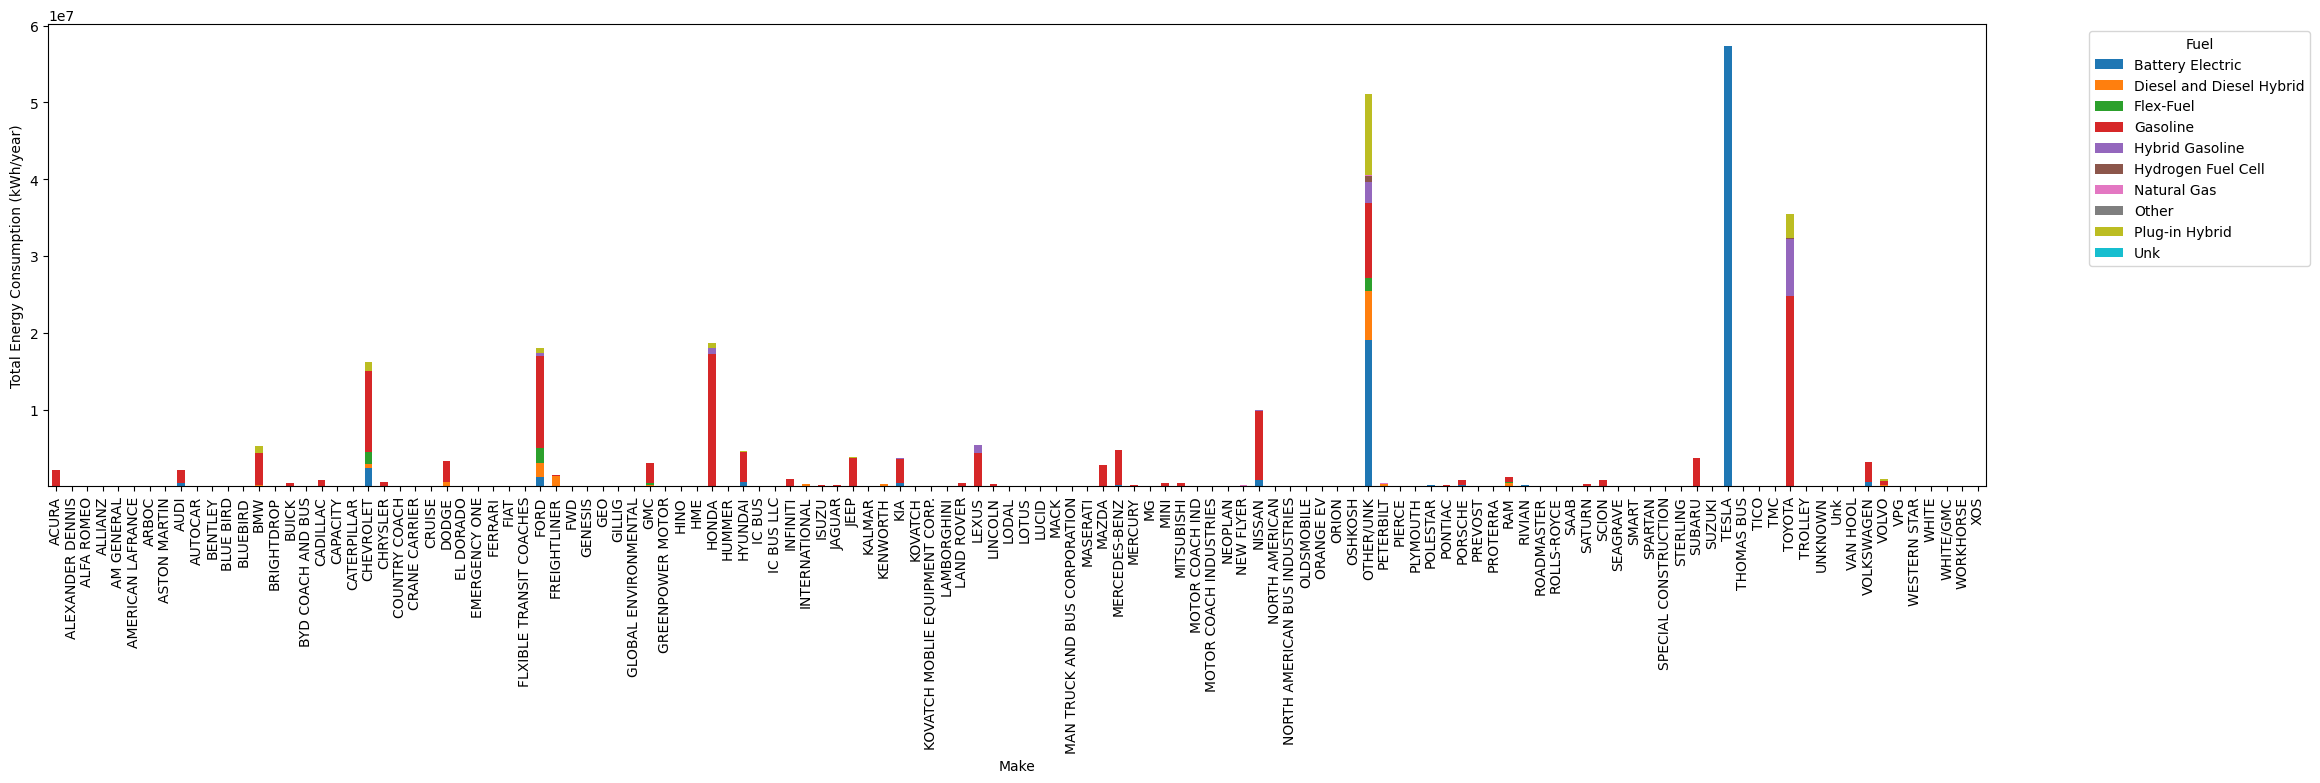

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Define energy consumption values (kWh/mile) for each fuel type
energy_consumption = {'Gasoline': 0.015, 'Other': 0, 'Diesel and Diesel Hybrid': 0.018, 'Natural Gas': 0.02, 
                      'Hybrid Gasoline': 0.025, 'Flex-Fuel': 0.015, 'Battery Electric': 0.3, 
                      'Plug-in Hybrid': 0.15, 'Hydrogen Fuel Cell': 0.2}

# Convert Duty variable to numerical (Light = 1, Heavy = 2)
df['Duty'] = df['Duty'].map({'Light': 1, 'Heavy': 2})

# Add a new column to the DataFrame to represent energy consumption per mile
df['Energy Consumption (kWh/mile)'] = df['Fuel'].map(energy_consumption)

# Calculate energy consumption per vehicle per year (kWh/year)
df['Energy Consumption (kWh/year)'] = df['Vehicles'] * df['Duty'] * df['Energy Consumption (kWh/mile)'] * 365

# Group the data by Make and Fuel, and sum the total energy consumption per year
grouped = df.groupby(['Make', 'Fuel'])['Energy Consumption (kWh/year)'].sum().unstack()

# Plot the total energy consumption by Make and Fuel using a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 6))
ax.set_ylabel('Total Energy Consumption (kWh/year)')
ax.legend(title='Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


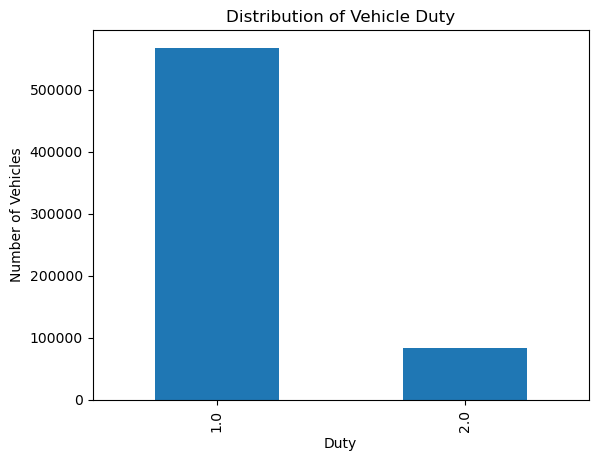

In [26]:
import matplotlib.pyplot as plt

# Count the number of light and heavy vehicles
duty_counts = df['Duty'].value_counts()

# Plot the results as a bar chart
duty_counts.plot(kind='bar')
plt.xlabel('Duty')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Duty')
plt.show()

In [27]:
df['Vehicles'].count()

767054

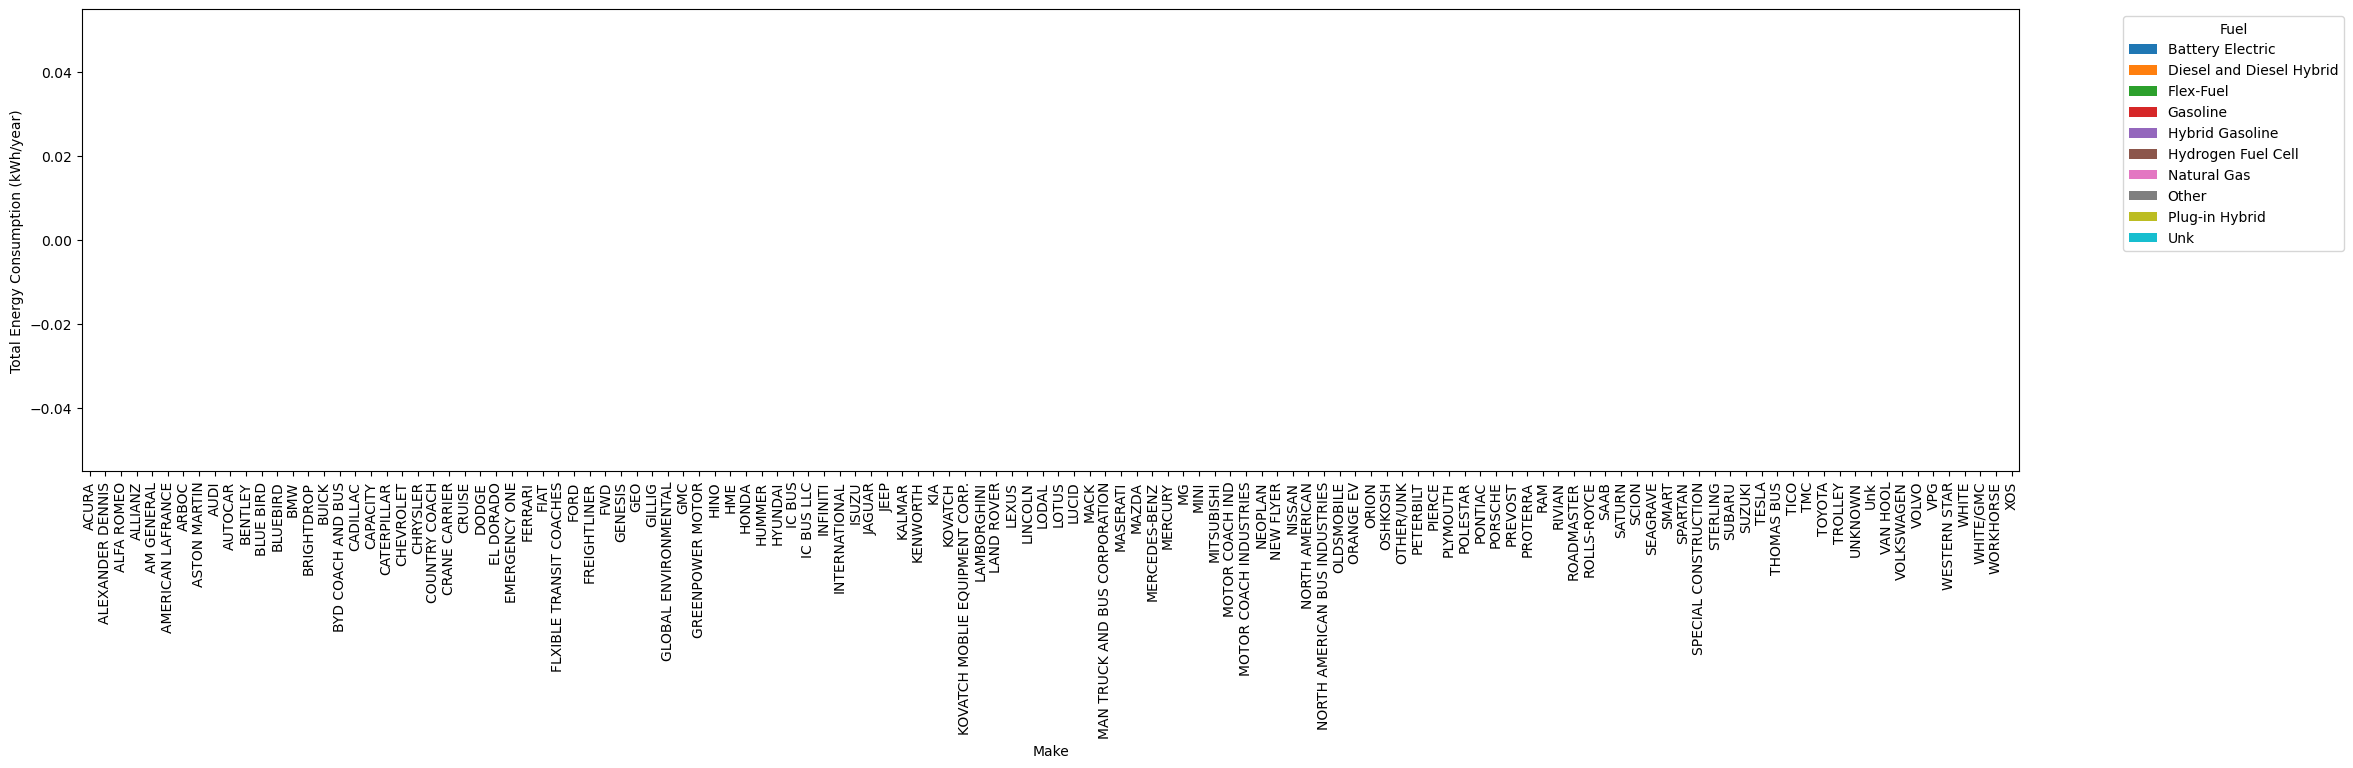

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define energy consumption values (kWh/mile) for each fuel type
energy_consumption = {'Gasoline': 0.015, 'Other': 0, 'Diesel and Diesel Hybrid': 0.018, 'Natural Gas': 0.02, 
                      'Hybrid Gasoline': 0.025, 'Flex-Fuel': 0.015, 'Battery Electric': 0.3, 
                      'Plug-in Hybrid': 0.15, 'Hydrogen Fuel Cell': 0.2}

# Convert Duty variable to numerical (Light = 1, Heavy = 2)
df['Duty'] = df['Duty'].map({'Light': 1, 'Heavy': 2})

# Add a new column to the DataFrame to represent energy consumption per mile
df['Energy Consumption (kWh/mile)'] = df['Fuel'].map(energy_consumption)

# Calculate energy consumption per vehicle per year (kWh/year)
df['Energy Consumption (kWh/year)'] = df['Vehicles'] * df['Duty'] * df['Energy Consumption (kWh/mile)'] * 365

# Group the data by Make and Fuel, and sum the total energy consumption per year
grouped = df.groupby(['Make', 'Fuel'])['Energy Consumption (kWh/year)'].sum().unstack()

# Plot the total energy consumption by Make and Fuel using a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 6))
ax.set_ylabel('Total Energy Consumption (kWh/year)')
ax.legend(title='Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_Year = df.groupby('Model Year').count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_Year)
    
    # calculate the total number of vehicles
df['Vehicles'].count()

Model Year
<2009    101302
2017      52104
2019      50646
2016      50340
2015      49676
2018      49075
2021      45942
2014      45758
2022      45360
2020      45077
2013      44772
2012      41593
2011      36927
2008      34822
2010      30780
2009      27013
2023      15867
Name: Vehicles, dtype: int64


767054

In [30]:
excel_file=pd.ExcelWriter("vehicles_by_Year2023.xlsx")
vehicles_by_Year.to_excel(excel_file)
excel_file.save()

C:\Users\schowdho\AppData\Local\Temp\ipykernel_25416\234099101.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


In [31]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_Fuel_Duty = df.groupby(['Fuel', 'Duty']).count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_Fuel_Duty)
    
    # calculate the total number of vehicles
df['Vehicles'].count()

Series([], Name: Vehicles, dtype: int64)


767054

In [33]:
total_vehicles = df.shape[0]

print(f"Total number of vehicles: {total_vehicles}")

Total number of vehicles: 767054
